In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import sympy as sym
import warnings
from IPython.display import display, Math
from numpy.lib.scimath import sqrt as csqrt

In [3]:
def f(x):
    return np.cos(2*np.pi*x/21) + 0.2*(-1)**x

Text(0.5, 1.0, 'Block of X')

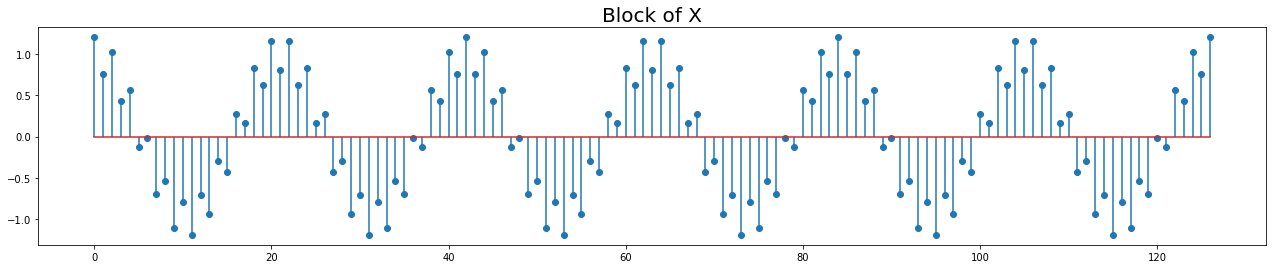

In [4]:
# Function definition

X = np.arange(0,5096)
M = 128 # Block size
Y = f(X)

# Plotting one block of X
plt.figure(figsize=(22,4))
plt.stem(Y[0:M-1])
plt.title("Block of X", fontsize=20)

## One block convolution

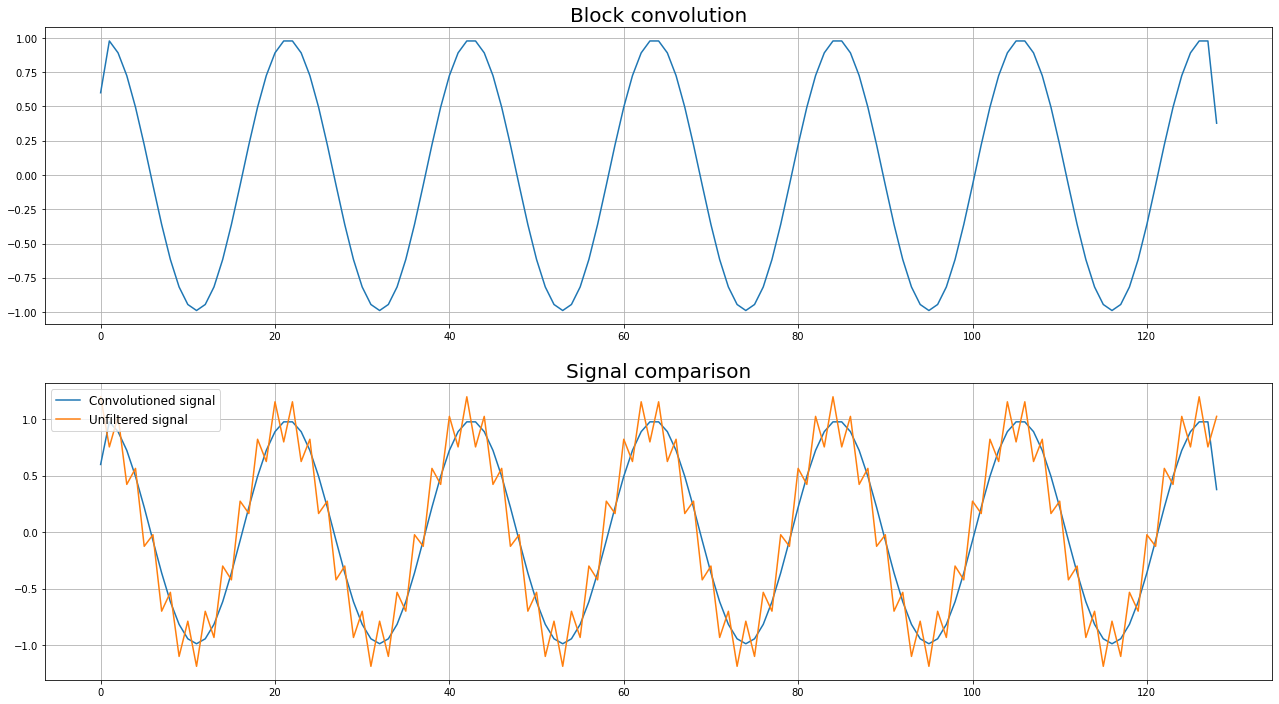

In [20]:
# Convolution between block of X and h

h = [1/2 , 1/2]
y = np.zeros(M+np.size(h)-1)
Ycut = Y[0:M]

for i in range(np.size(h)-1):
    for j in range(i+1):
        y[i] = y[i] + h[j]*Ycut[i-j]

for i in range(M-np.size(h)+1):
    for j in range(np.size(h)):
        y[i+np.size(h)-1] = y[i+np.size(h)-1] + h[-j-1]*Ycut[j+i]

for i in range(np.size(h)-1):
    for j in range(np.size(h)-i-1):
        y[i+M] = y[i+M] + h[j+i+1]*Ycut[-j-1]

figure, ax = plt.subplots(2,1,figsize=(22,12))
ax[0].plot(np.arange(0,M+np.size(h)-1),y)
ax[0].set_title("Block convolution",fontsize=20)
ax[0].grid(True)

ax[1].plot(np.arange(0,M+np.size(h)-1),y, label="Convolutioned signal")
ax[1].plot(np.arange(0,M+np.size(h)-1),Y[0:M+np.size(h)-1], label="Unfiltered signal")
ax[1].set_title("Signal comparison",fontsize=20)
ax[1].legend(fontsize=12)
ax[1].grid(True)

## Overlap and add

39.8125


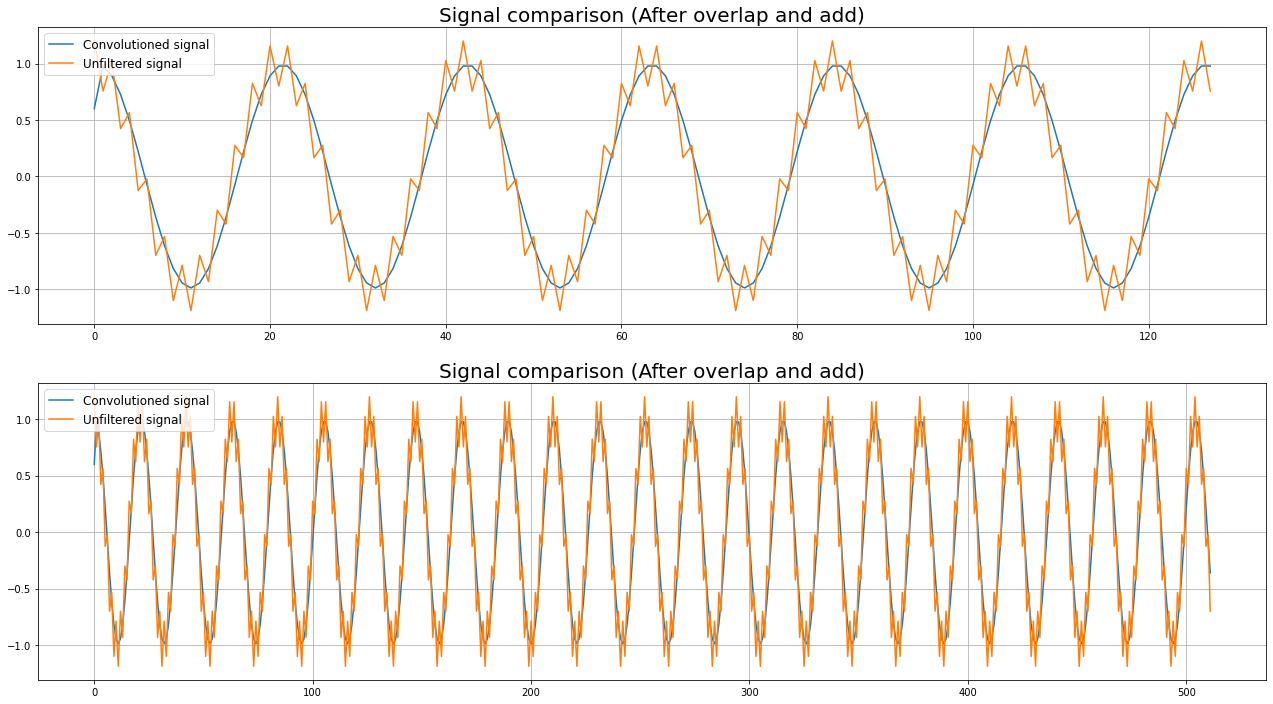

In [35]:
h = [1/2 , 1/2]
nb = 39 # Number of blocks
print(5096/M)

TotalY = np.zeros(M*nb)

for k in range(nb):
    y = np.zeros(M+np.size(h)-1)
    Ycut = Y[k*M : (k+1)*M]

    for i in range(np.size(h)-1):
        for j in range(i+1):
            y[i] = y[i] + h[j]*Ycut[i-j]

    for i in range(M-np.size(h)+1):
        for j in range(np.size(h)):
            y[i+np.size(h)-1] = y[i+np.size(h)-1] + h[-j-1]*Ycut[j+i]

    for i in range(np.size(h)-1):
        for j in range(np.size(h)-i-1):
            y[i+M] = y[i+M] + h[j+i+1]*Ycut[-j-1]

    if(k < (nb-1)):
        TotalY[M*k : M*(k+1) + np.size(h)-1] = TotalY[M*k : M*(k+1) + np.size(h)-1] + y
    else:
        TotalY[M*k : M*(k+1)] = TotalY[M*k : M*(k+1)] + y[np.size(h)-1:]

xlims = [128,512] # Graph x limits

figure, ax = plt.subplots(2,1,figsize=(22,12))
ax[0].plot(np.arange(0,xlims[0]),TotalY[0:xlims[0]], label="Convolutioned signal")
ax[0].plot(np.arange(0,xlims[0]),Y[0:xlims[0]], label="Unfiltered signal")
ax[0].set_title("Signal comparison (After overlap and add)",fontsize=20)
ax[0].legend(fontsize=12)
ax[0].grid(True)

ax[1].plot(np.arange(0,xlims[1]),TotalY[0:xlims[1]], label="Convolutioned signal")
ax[1].plot(np.arange(0,xlims[1]),Y[0:xlims[1]], label="Unfiltered signal")
ax[1].set_title("Signal comparison (After overlap and add)",fontsize=20)
ax[1].legend(fontsize=12)
ax[1].grid(True)